# Linear Regression


In [1]:
# importing the required modules
import numpy as np 
import matplotlib.pyplot as plt

# to get matplot figures render correctly in the notebook use:
%matplotlib inline 

## Loading and Inspecting the Data

The first step in all machine learning problems is to load and inspect the data. First, let's load the data.   
The datafile `ex1data1.txt` is a comma-separated file that contains data of 97 cities on the population size and the profit. The file contains two columns:
- column 1 yields the Population of a City in 10,000s
- column 2 yields the corresponding Profit in $10,000s



Use the code snippet below to load the data into a 2D numpy array `data`:

In [2]:
FILENAME = 'ex1data1.txt'  # points to the datafolder; either a relative or absolute path
DELIMITER = ','  # we use a lot of csv or txt files where the data is separated by a comma

data = np.loadtxt(FILENAME, delimiter=DELIMITER)


Inspect the data by e.g. printing the shape of `data` and the first couple of rows

In [3]:
# check the shape of data by printing the nr.rows and nr.columns
print(data.shape)


(97, 2)


In [4]:
# print the first and last couple of rows
print(data[:5])
print(data[-5:])



[[ 6.1101 17.592 ]
 [ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]]
[[ 5.8707   7.2029 ]
 [ 5.3054   1.9869 ]
 [ 8.2934   0.14454]
 [13.394    9.0551 ]
 [ 5.4369   0.61705]]


It is always good to create a plot to have a visulation of the data. In the next block of code plot the data, where you plot the population size on the x-axis and the profit on the y-axis.

'YOUR CODE GOES HERE '

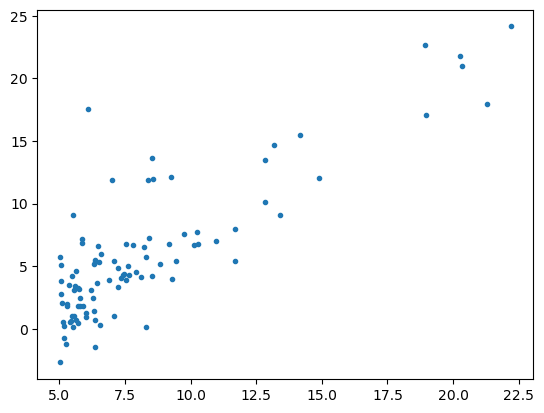

In [5]:
x = data[:, 0]
y = data[:, 1]

# create the scatter plot
plt.scatter(x, y, marker='.')

'''YOUR CODE GOES HERE '''


## Defining the model

This notebook is about linear regression. The corresponding model is given by (lecture notes eq. 2.6):
$$  \mathbf{\hat{y}} =  \mathbf{X}  \boldsymbol{\theta}  $$ 
with $\mathbf{X}$ the feature matrix , $\mathbf{\hat{y}}$ the predicted label vector and $\boldsymbol{\theta}$ the weight vector. 

The weight vector is found by minimizing the *loss* $L$. The loss is given by (lecture notes eq. 2.9):
$$  L = \frac{1}{M} \frac{1}{2} \left \| \mathbf{X}  \boldsymbol{\theta} - \textbf y \right \|^2 $$


#### Create the feature matrix and label vector

The feature matrix is represented by a 2D numpy array `X` composed of a column filled with ones (the bias) and column(s) with the feature(s). Also we need to define the label vector y as a 2D numpy array `y`.

In [6]:
# the number of samples M
M = data.shape[0]

# the number of features N (excluding the bias)
N = 1

# define the feature matrix as a (M x N+1) ndarray


X = np.column_stack((np.ones(M),data[:,0]))

print(X)

# define the label vector as a (M x 1) ndarray
y=data[:,1].reshape(-1,1)
print(y)

[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1.      7

#### Implement the loss function
Next, define a function that computes the loss given the feature matrix, the label vector and the weight vector.

function | description
----|----
`compute_loss(X, y, theta)` | This function takes the feature matrix `X`, label vector `y` and the weight vector `theta` and returns the loss


In [7]:
def compute_loss(X, y, theta):
    """
    computes the loss of a linear regression model

    Parameters
    ----------
    X : (M x N+1) ndarray (with M the number of samples and N the number of features excluding the bias)
        The feature matrix including the bias in the first column
    y : (M x 1) ndarray
        label vector
    theta : (N+1 x 1) ndarray
        The weight vector inlcuding the bias

    Returns
    -------
    loss : float
        The loss

    """
    
    '''YOUR CODE GOES HERE '''
    M= len(X)
    
    loss= 1/M * 1/2* np.linalg.norm(X@theta-y)
    
    return loss

In [8]:
# test the function with some value for theta
theta = np.array([1, 1]).reshape(-1,1)
loss = compute_loss(X, y, theta)
print(loss)

0.23004392780178237


## Train the Model

The next step is to train the model. We use the gradient descent algortihm for this. The weight vector is updated according to:
$$  \boldsymbol{\theta} \rightarrow \boldsymbol{\theta} - \eta \frac{\mathrm{d} L}{\mathrm{d} \boldsymbol{\theta}} $$
where $\eta$ is a *hyperparameter* that allows to tune the rate of descent, and the gradient defined as (lecture notes eq. 2.10):

$$ \frac{\mathrm{d} L}{\mathrm{d} \boldsymbol{\theta}}  = \frac{1}{M} \mathbf{X}^T  \left (  \mathbf{X}  \boldsymbol{\theta} - \textbf y \right )     $$

Therefore we need to implement the following functions:

function | description
--------|----
`gradient(X, y, theta)` | This function takes the feature matrix `X`, label vector `y` and the weight vector `theta` and returns the gradient of the loss w.r.t. the weight(s)
`train(X, y, theta, eta, num_iters)` | This function takes the feature matrix `X`, label vector `y`, the weight vector `theta`, hyperparameter `eta` and the number of iteration steps `num_iters`, and returns the weight vector the minimises the loss.

In [9]:
def gradient(X, y, theta):
    """
    computes the gradient of a linear regression model

    Parameters
    ----------
    X : (M x N+1) ndarray (with M the number of samples and N the number of features excluding the bias)
        The feature matrix including the bias in the first column
    y : (M x 1) ndarray
        label vector
    theta : (N+1 x 1) ndarray
        The weight vector inlcuding the bias

    Returns
    -------
    grad : (N+1 x 1) ndarray
        The gradient of the loss w.r.t the weight vector theta

    """
    
    '''YOUR CODE GOES HERE '''
    M = len(X)
    grad= 1/M* np.transpose(X)@(X@theta-y)
    
    return grad

In [10]:
# test the function for some value of theta
theta = np.array([1, 1]).reshape(-1,1)
grad = gradient(X, y, theta)
print(grad)

[[ 3.32066495]
 [24.23489308]]


Next, define the function `train()` that implements the gradient descent algorithm.

In [11]:
def train(X, y, theta, eta = 0.01, num_iters = 5500):
    """
    Implements the gradient descent algorithm for a linear regression model

    Parameters
    ----------
    X : (M x N+1) ndarray (with M the number of samples and N the number of features excluding the bias)
        The feature matrix including the bias in the first column
    y : (M x 1) ndarray
        label vector
    theta : (N+1 x 1) ndarray
        The weight vector inlcuding the bias
    eta : float, optional
        The rate. The default is 0.01.
    num_iters : int, optional
        Number of iterations that is performed. The default is 5500.

    Returns
    -------
    theta : (N+1 x 1) ndarray
        The optimised weight vector    
    loss : (num_iters,) ndarray
        The loss at each iteration
    """
    
    '''YOUR CODE GOES HERE '''
    loss=[]
    theta1=[]
    for i in range(0,num_iters):
        theta= theta- eta*gradient(X,y,theta)
        oneLoss = compute_loss(X, y, theta)
        loss.append(oneLoss)
        #theta1.append(theta)

    return (theta, loss)

We can now train the model.

In [12]:
# intialize theta to some value
theta =  np.array([1, 1]).reshape(-1,1)

# train the model
theta, loss = train(X,y, theta )


# print the computed weight vector
print(f'weigths: {theta}')

weigths: [[-3.89554233]
 [ 1.19300968]]


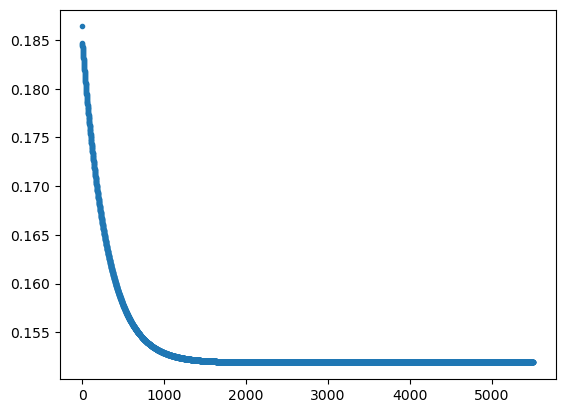

In [13]:
# create a plot of the loss versus the interation number

'''YOUR CODE GOES HERE '''
x= [i for i in range(len(loss))]
plt.scatter(x,loss, marker='.')


## Evaluate the model

To evaluate the model, we need a function `predict(X, theta)` that predicts the label `y` given some new values of the features `X`. Implement this function below.

In [14]:
def predict(X, theta):
    """
    Predicts the label y given features X for a linear regression model with weights theta

    Parameters
    ----------
    X : (M x N+1) ndarray (with M the number of samples and N the number of features excluding the bias)
        The feature matrix including the bias in the first column 
    theta : (N+1 x 1) ndarray
        The weight vector inlcuding the bias

    Returns
    -------
    y_pred : (M x 1) ndarray
        The predicted labels    
    """       
    
    '''YOUR CODE GOES HERE '''
    y_pred= X@theta
    
    return y_pred

Test the function by plotting the original data, but now including a line-plot of the prediction of profits for population sizes covering the range from 50000 to 250000.


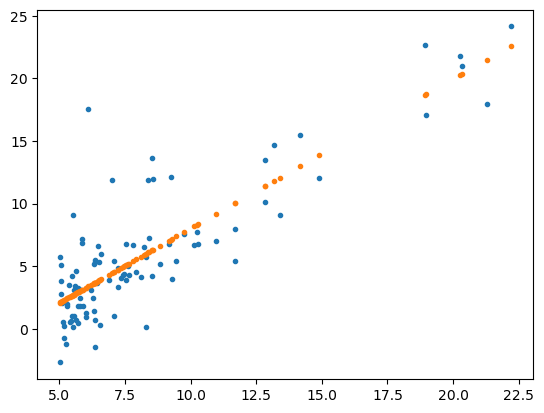

In [15]:
# create a feature matrix X

'''YOUR CODE GOES HERE '''
X=  np.column_stack((np.ones(M),data[:,0]))

# predict the corresponding labels

'''YOUR CODE GOES HERE '''
y_pred= predict(X,theta)

# plot the original data and the predictions

'''YOUR CODE GOES HERE '''
x = data[:, 0]
y = data[:, 1]

# create the scatter plot
plt.scatter(x, y, marker='.')
plt.scatter(x,y_pred,marker='.')

## Minimizing the loss by direct computation
Rather than using the gradient descent method, linear regression allows to directly compute the weight that minimizes the loss. The expression is given by (see reader eq. 2.13):

$$ \boldsymbol{\theta}  = \left ( \mathbf{X}^T  \mathbf{X} \right )^{-1} \mathbf{X}^T \textbf y $$

The term $\left ( \mathbf{X}^T  \mathbf{X} \right )^{-1} \mathbf{X}^T$ is the so-called pseude-inverse of $\mathbf{X}$. 

In the cell below you define a function `solve(X, y)` that applies this equation to compute the weights.

***TIP: computing the pseudo-inverse can be numerically instable resulting in high nummerical errors. Therefore you rather use the build-in numpy function `np.linalg.pinv(X)` to compute the pseudo-inverse rather than computing it following the eqaution above.***


In [16]:
def solve(X, y):
    """
    Computes the weights by direct computation 

    Parameters
    ----------
    X : (M x N+1) ndarray (with M the number of samples and N the number of features excluding the bias)
        The feature matrix including the bias in the first column
    y : (M x 1) ndarray
        label vector
    
    Returns
    -------
    theta : (N+1 x 1) ndarray
        The optimised weight vector    
    """
    
    '''YOUR CODE GOES HERE '''
    theta= np.linalg.pinv(X)@y
    
    return theta

In [17]:
# use the function solve() to compute weights and compare to 
# the results obtained by the gradient descent method

theta = solve(X, y)
print(theta)

[-3.89578088  1.19303364]


## Linear regression of "non-linear" data

In the example above there was a linear relation between the label (profit) and the feature (population size). If this is not the case we can still use linear regression if we add features to the feature matrix. One way to do this is to add polynomial features. If we have only one orginal feature ($x_1$), then the polynomials that can be added as feature are:

$$ 1, x_1, x_1^2, x_1^3, x_1^4, ... \text{ etc}$$

Have a look at the following data set `ex1data2.txt` that contains two columns where the first column is the feature and the second column is the label.

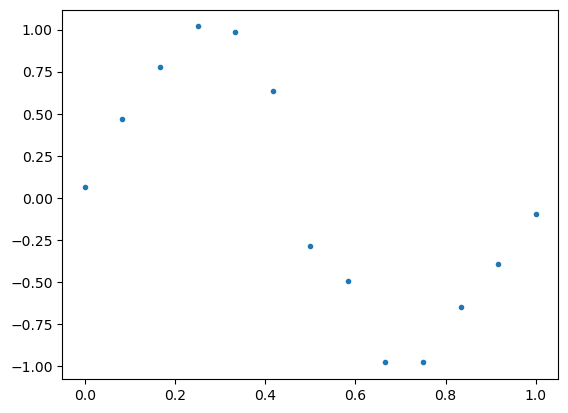

In [18]:
# load the data set and make a scatterplot of the data
FILENAME = 'ex1data2.txt'  # points to the datafolder; either a relative or absolute path
DELIMITER = ','  # we use a lot of csv or txt files where the data is separated by a comma

data = np.loadtxt(FILENAME, delimiter=DELIMITER)

# make a plot of the data

'''YOUR CODE GOES HERE '''
x = data[:, 0]
y = data[:, 1]

# create the scatter plot
plt.scatter(x, y, marker='.')


We will try to fit this data using polynomials. To this end we need to build a feature matrix `X` that contains the polynomials of the feature upto some degree.

In the cell below you define a function `polynomials(x, degree)` that computes the feature matrix `X` upto the specified degree.

In [19]:
# write a function that computes the feature matrix X

def polynomials(x, degree):
    """
    Computes the feature matrix X composed of all polynomials of x upto order degree
    and includes the bias
    
    Parameters
    ----------
    x : 1D ndarray of length M (with M the number of samples) 
        features  
    degree : integer >= 0
        the highest poly degree that is included

    Returns
    -------
    X : (M x degree + 1) ndarray
        The feature matrix    
    """       
    
    '''YOUR CODE GOES HERE '''
    
    X = np.column_stack((np.ones(len(x)),x))
    for i in range(2,degree+1 ):
        xdegree= [k**i for k in x]
        X=np.column_stack((X,xdegree))
    
    return X
    

In [20]:
# test the function by creating a feature matrix from the data upto degree 3
X = polynomials(data[:,0], 3)
print(x)

print(X)

[0.         0.08333333 0.16666667 0.25       0.33333333 0.41666667
 0.5        0.58333333 0.66666667 0.75       0.83333333 0.91666667
 1.        ]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 8.33333333e-02 6.94444444e-03 5.78703704e-04]
 [1.00000000e+00 1.66666667e-01 2.77777778e-02 4.62962963e-03]
 [1.00000000e+00 2.50000000e-01 6.25000000e-02 1.56250000e-02]
 [1.00000000e+00 3.33333333e-01 1.11111111e-01 3.70370370e-02]
 [1.00000000e+00 4.16666667e-01 1.73611111e-01 7.23379630e-02]
 [1.00000000e+00 5.00000000e-01 2.50000000e-01 1.25000000e-01]
 [1.00000000e+00 5.83333333e-01 3.40277778e-01 1.98495370e-01]
 [1.00000000e+00 6.66666667e-01 4.44444444e-01 2.96296296e-01]
 [1.00000000e+00 7.50000000e-01 5.62500000e-01 4.21875000e-01]
 [1.00000000e+00 8.33333333e-01 6.94444444e-01 5.78703704e-01]
 [1.00000000e+00 9.16666667e-01 8.40277778e-01 7.70254630e-01]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]]


The next step is to fit the data (use the function `solve()`). Trys different degrees.

[ -0.03139373  10.28100383 -30.7982535   20.64163832]


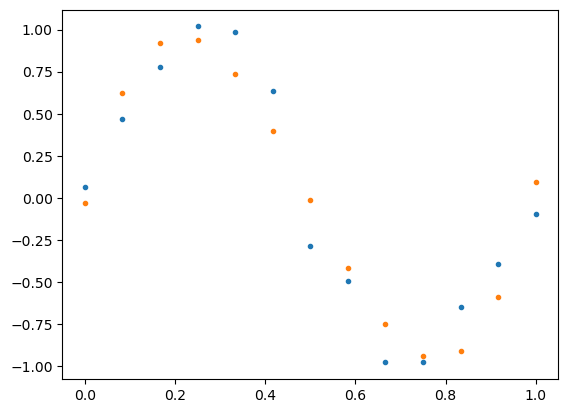

In [21]:
# perform a fit and plot the result

# prepare X and y
'''YOUR CODE GOES HERE '''
X = polynomials(data[:,0], 3)


x=  data[:,0]
y = data[:, 1]

# compute the weights
'''YOUR CODE GOES HERE '''
theta = solve(X, y)
print(theta)



# Create a feature matrix X for the prediction
'''YOUR CODE GOES HERE '''
#X=  np.column_stack((np.ones(len(data[:,0])),data[:,0]))



# predict the corresponding labels
'''YOUR CODE GOES HERE '''
y_pred= predict(X,theta)


# plot the original data and the predictions
'''YOUR CODE GOES HERE '''
plt.scatter(x, y, marker='.')
plt.scatter(x,y_pred,marker='.')



As you have seen, the data is *under-fitted* if the number of degrees is too low. If the number of degrees is too high you will have *over-fitting*. The challenge is too have a good trade-off. 

In the next cell you will make a plot of the loss (y-axis) against the polynomial degree (x-axis).

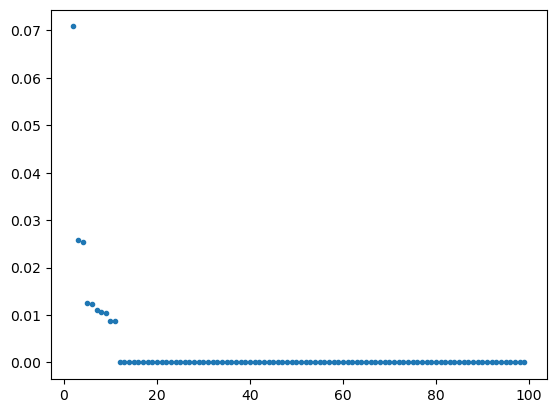

In [28]:
# make a plot of the loss as function of the polynomial degree

'''YOUR CODE GOES HERE '''
y = data[:, 1]
degree =[ i for i in range(2,100)]
lossarr=[]
for i in range(2, 100 ):
    X = polynomials(data[:,0], i)
    theta = solve(X, y)
    loss = compute_loss(X, y, theta)
    lossarr.append(loss)
plt.scatter(degree,lossarr , marker='.')

The curve above suggest to use a high degree in order to make the losses as small as possible. However most likely that solution will not generalize well to another sample of the data (*over-fitting*). So next, you will use a test data set to check how well the model performs. The procedure is as follows:
- use the train data set to fit the model
- use the model to compute the loss of both train and test data sets
- repeat for different degrees
- finally make a plot of the loss for both train and test data sets as function of the degree
- inspect the plot and determine the degree that gives the best results

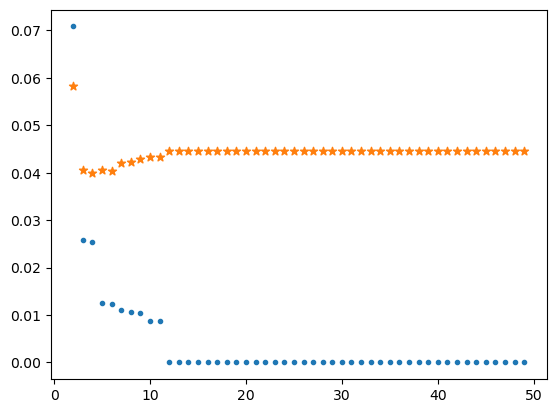

In [33]:
# carry out the procedure described above

FILENAME_TRAIN = 'ex1data2.txt'  # points to the datafolder; either a relative or absolute path
FILENAME_TEST = 'ex1data3.txt'
DELIMITER = ','  # we use a lot of csv or txt files where the data is separated by a comma

data_train = np.loadtxt(FILENAME_TRAIN, delimiter=DELIMITER)
data_test = np.loadtxt(FILENAME_TEST, delimiter=DELIMITER)

'''YOUR CODE GOES HERE '''
y = data_train[:, 1]



y_test= data_test[:, 1]

loss_train=[]
loss_test=[]
degree=[i for i in range(2,50)]
for i in range(2, 50 ):
    X = polynomials(data_train[:,0], i)

    theta = solve(X, y)
    loss = compute_loss(X, y, theta)
    X1= polynomials(data_train[:,0], i)
    loss2 = compute_loss(X1, y_test, theta)

    loss_train.append(loss)
    loss_test.append(loss2)

    
plt.scatter(degree,loss_train,marker='.')
plt.scatter(degree,loss_test,marker='*')

## Regularisation
The problem with the higher order polynomials in the example above can be reduced by using regularisation. The weights can be computed directly using (reader eq. 2.25):

$$ \boldsymbol\theta = (\mathbf{X}^T\mathbf{X}+\lambda  M \mathbf{I})^{-1}\mathbf{X}^T  \textbf{y} $$

Implement the function `solve_reg(X, y, labda)` in the cell below. Note that you cannot use the `np.linalg.pinv()` function. However this is not a problem in this case as the addition of the regularisation term causes the problem to be more numerically stable. 

In [62]:
def solve_reg(X, y, labda):
    """
    Computes the weights by direct computation 

    Parameters
    ----------
    X : (M x N+1) ndarray (with M the number of samples and N the number of features excluding the bias)
        The feature matrix including the bias in the first column
    y : (M x 1) ndarray
        label vector
    labda: float
        regularisation hyperparameter
    
    Returns
    -------
    theta : (N+1 x 1) ndarray
        The optimised weight vector    
    """
    
    '''YOUR CODE GOES HERE '''
    M=len(X)
    XtX = np.dot(np.transpose(X), X)
    regularizer = labda * M * np.identity(X.shape[1])
    inverse = np.linalg.inv(XtX + regularizer)

    # Calculate theta using the formula (X^T*X + lamda*M*I)^-1 * X^T*y
    theta = np.dot(inverse, np.dot(X.T, y))

    
    return theta
    

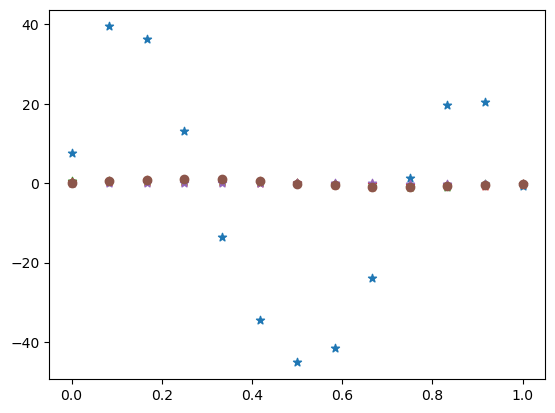

In [64]:
# perform a fit and plot the result
# include results for a few different labda's


for labda in [0, 0.0001, 0.001, 0.1, 1]:
    
    # prepare X and y
    '''YOUR CODE GOES HERE '''
    x=  data_train[:,0]
    M=len(x)
    X = polynomials(data_train[:,0], 50)


    x=  data_train[:,0]
    y = data_train[:, 1]

    # compute the weights

    theta = solve_reg(X, y,labda)


    

 
    # Create a feature matrix X for the prediction
    '''YOUR CODE GOES HERE '''
    
    # predict the corresponding labels
    '''YOUR CODE GOES HERE '''
    y_pred= predict(X,theta)

    

    # plot the predictions
    '''YOUR CODE GOES HERE '''
    plt.scatter(x,y_pred,marker="*")

# plot the original data 
'''YOUR CODE GOES HERE '''
x=  data[:,0]
y = data[:, 1]
plt.scatter(x, y, marker ="o")

Finally make a new plot of the loss versus the degree of both train and test data set, but now for a proper choice of the regularisation hyperparameter labda.

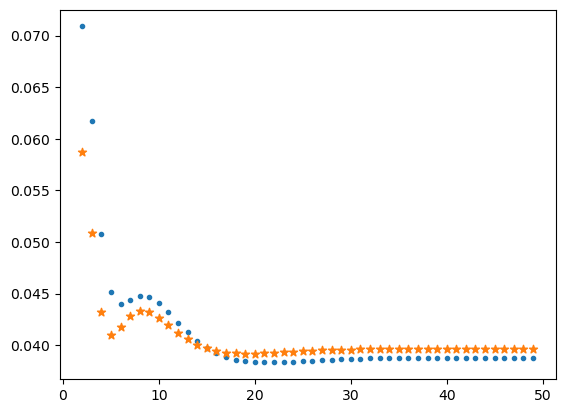

In [74]:
# create a plot of the loss versus degree of both train and test data set

'''YOUR CODE GOES HERE '''

loss_train=[]
loss_test=[]
degree=[i for i in range(2,50)]
for i in range(2, 50 ):
    X = polynomials(data_train[:,0], i)

    theta = solve_reg(X, y,0.001)
    loss = compute_loss(X, y, theta)
    X1= polynomials(data_train[:,0], i)
    loss2 = compute_loss(X1, y_test, theta)

    loss_train.append(loss)
    loss_test.append(loss2)

    
plt.scatter(degree,loss_train,marker='.')
plt.scatter(degree,loss_test,marker='*')



## Using sklearn
Next we will explore the linear_regression using the machine learning module *sklearn* (see this website for more info: https://scikit-learn.org/stable/).

To keep it simple you will perform two fits on the data set 'ex1data2.txt' (the train data set used above).
- using the sklearn class `LinearRegression`. 
- using the sklearn class `Ridge` for regularised regression.

In both cases use a poly degree of 9 and plot the results in one single plot together with the data. 

Compare the results with previous solutions.

In [72]:
# import from the module the linear regression model
from sklearn.linear_model import LinearRegression, Ridge

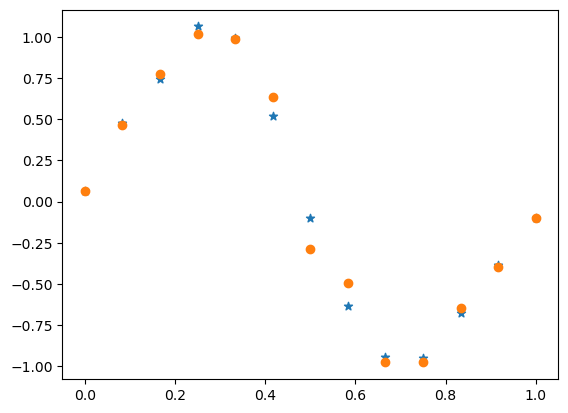

In [73]:

degree = 9

# create instances of the regression and of the regularised regression model
reg = LinearRegression()
reg_ridge = '''YOUR CODE GOES HERE '''

# prepare the data train set
'''YOUR CODE GOES HERE '''

x=  data_train[:,0]
y = data_train[:, 1]
X=polynomials(x,degree)
# train the models
'''YOUR CODE GOES HERE '''
reg.fit(X, y)


# Create a feature matrix X for the prediction
'''YOUR CODE GOES HERE '''
X=polynomials(x,degree)

# predict the corresponding labels
'''YOUR CODE GOES HERE '''
y_pred = reg.predict(X)


# plot the predictions
'''YOUR CODE GOES HERE '''
plt.scatter(x,y_pred,marker="*")

# plot the original data 
'''YOUR CODE GOES HERE '''
plt.scatter(x,y,marker="o")

## The end